In [2]:
import numpy as np
from tensorflow import keras
import tensorflow as tf

In [3]:
img_test = tf.io.read_file("/content/drive/MyDrive/Jedha/Final_project/cars_pic/citroen/Berlingo/berlingo_1.jpg")
img_test

NotFoundError: /content/drive/MyDrive/Jedha/Final_project/cars_pic/citroen/Berlingo/berlingo_1.jpg; No such file or directory [Op:ReadFile]

In [ ]:
img_test = tf.image.decode_jpeg(img_test)
img_test

<tf.Tensor: shape=(300, 400, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 25

In [ ]:
import pathlib

data_model = pathlib.Path("/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model")
print(data_model)

/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model


In [ ]:
for item in data_model.iterdir():
  print(item)

/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/Berlingo
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/C4
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/C4 Cactus
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/C3
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/C5 Aircross
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/108
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/208
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/308
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/3008
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/2008
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/Captur
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/Clio
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/Megane
/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model/Twingo
/content/drive/MyDrive/Jedha/Fina

In [ ]:
# Creation an ImageDataGenerator object in order to use data augmentation on the cars pictures

img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1), 
                                                                #shear_range=0.2, 
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.2)

In [ ]:
# Now we are able to set up the target image size and the batch size

img_generator_flow_train = img_generator.flow_from_directory(
    directory="/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model",
    target_size=(224, 224),
    batch_size=64,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory="/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model",
    target_size=(224, 224),
    batch_size=64,
    shuffle=True,
    subset="validation")

Found 5238 images belonging to 25 classes.
Found 1295 images belonging to 25 classes.


Label : 2008


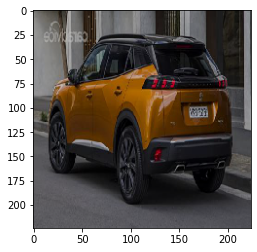

Label : Tiguan


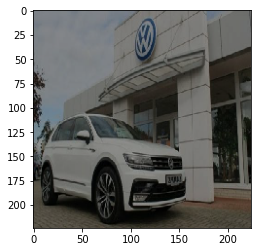

Label : Twingo


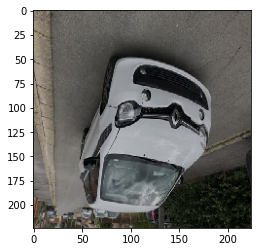

Label : Berlingo


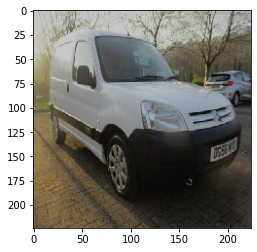

Label : Tiguan


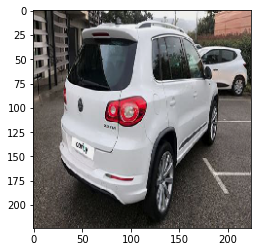

Label : C5 Aircross


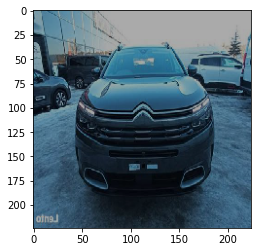

Label : 2008


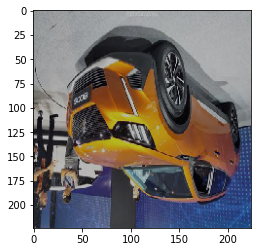

Label : 208


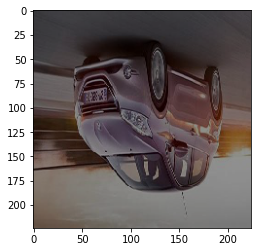

Label : Megane


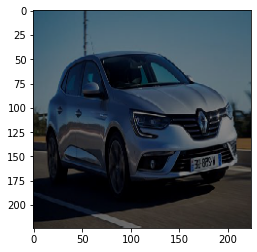

Label : 308


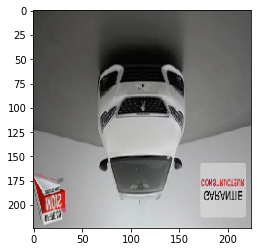

Label : Zoe


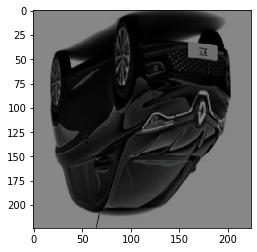

Label : Polo


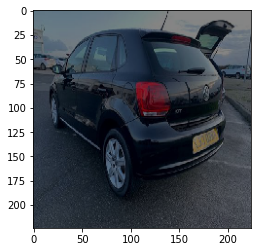

Label : Tiguan


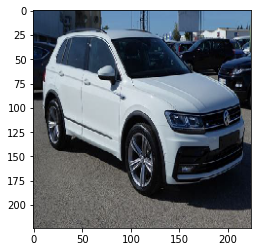

Label : Clio


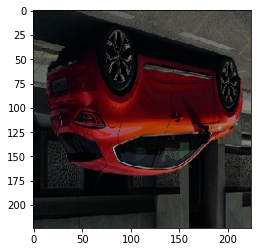

Label : 208


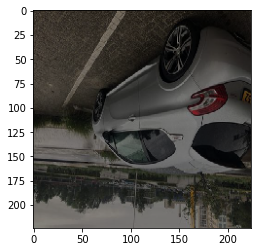

Label : Golf


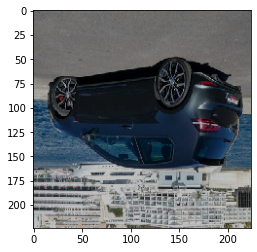

Label : Zoe


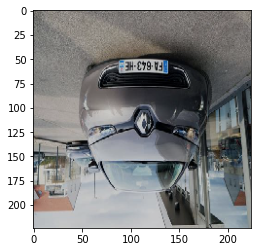

Label : Zoe


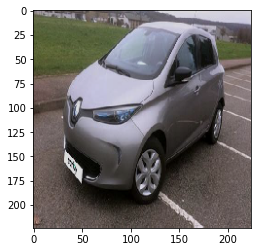

Label : Berlingo


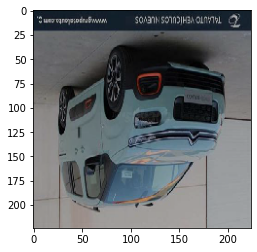

Label : Tiguan


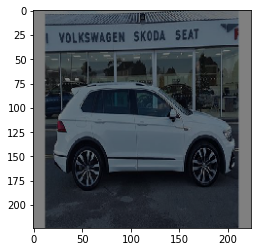

Label : C4


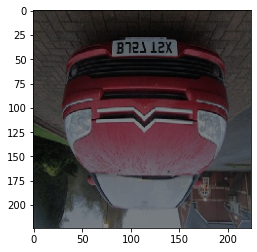

Label : Berlingo


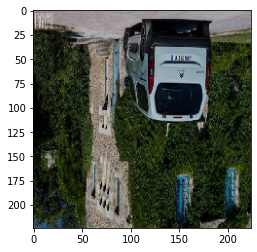

Label : Twingo


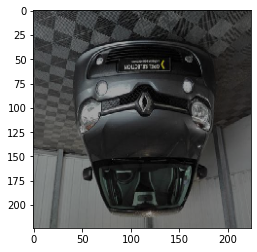

Label : Corolla


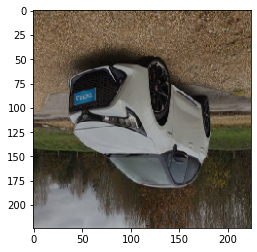

Label : Rav 4


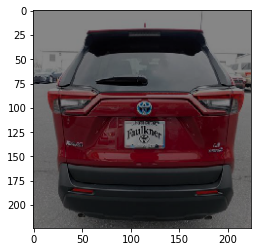

Label : 2008


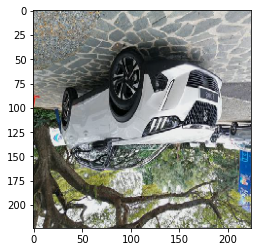

Label : Zoe


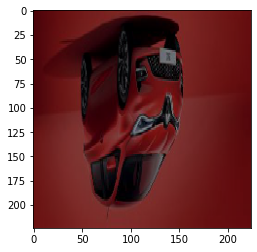

Label : Golf


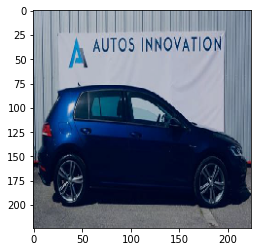

Label : Aygo


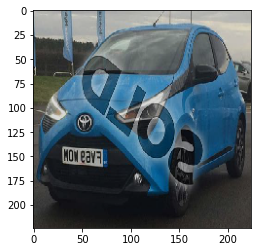

Label : Captur


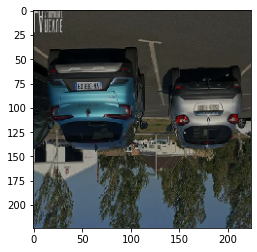

Label : Golf


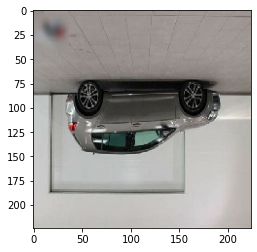

Label : C_HR


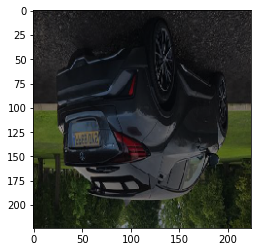

Label : C4 Cactus


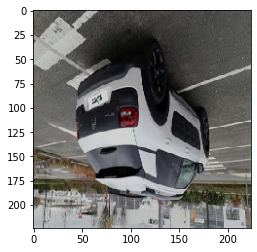

Label : 108


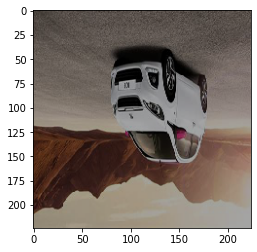

Label : Twingo


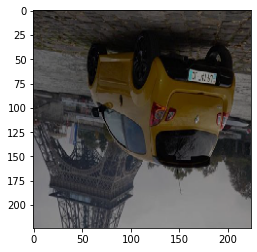

Label : 3008


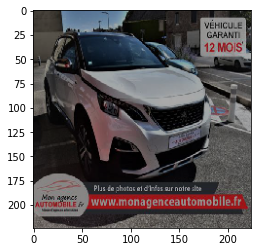

Label : C_HR


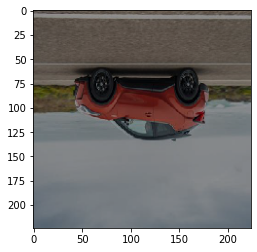

Label : 2008


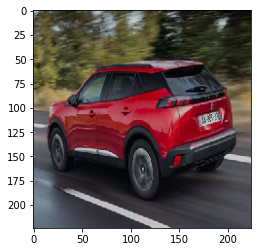

Label : Clio


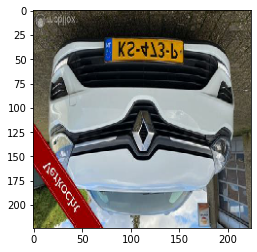

Label : C4 Cactus


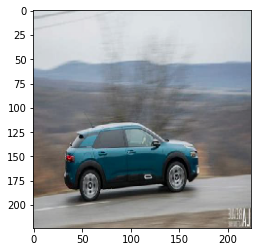

Label : Rav 4


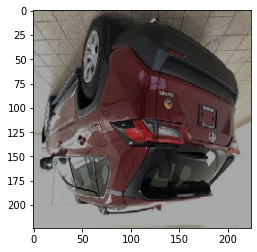

Label : T-Roc


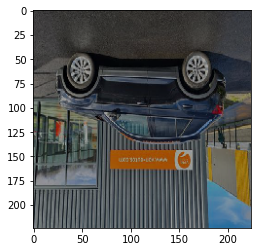

Label : 108


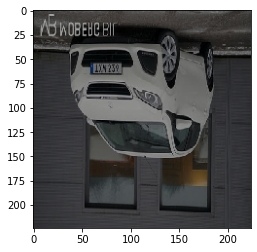

Label : C4


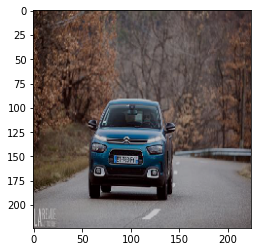

Label : 308


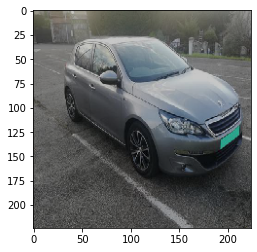

Label : Polo


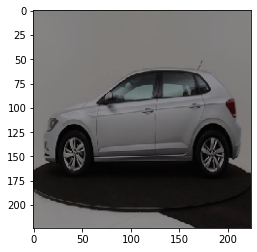

Label : Twingo


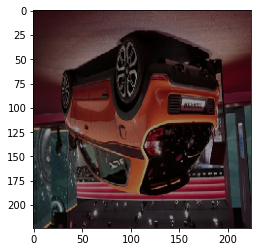

Label : Captur


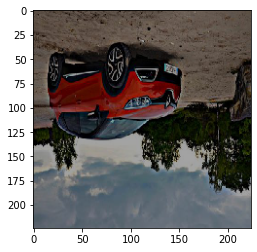

Label : C3


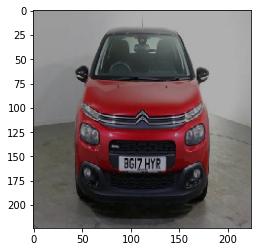

Label : Twingo


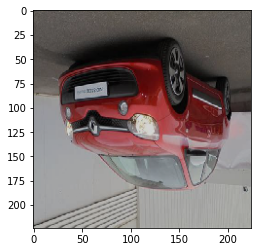

Label : Twingo


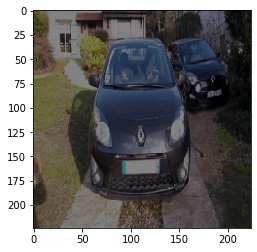

Label : Yaris


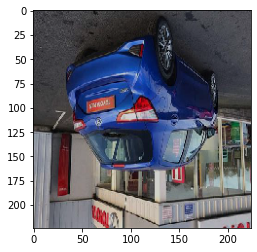

Label : Berlingo


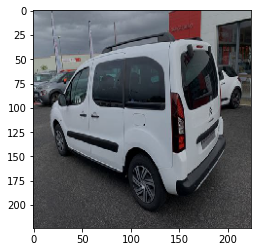

Label : Captur


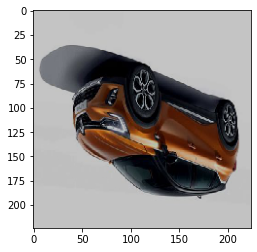

Label : Berlingo


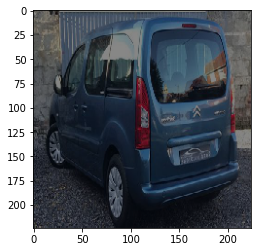

Label : Up !


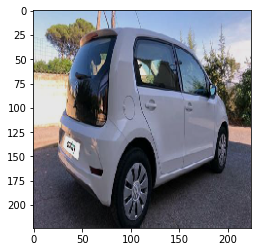

Label : C3


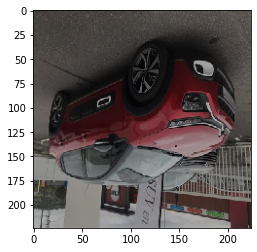

Label : Golf


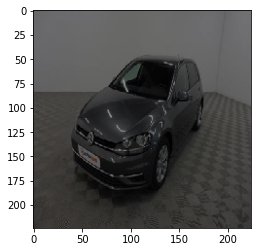

Label : 208


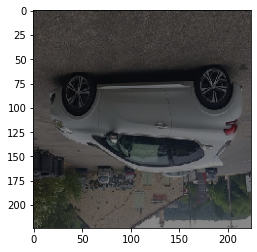

Label : Zoe


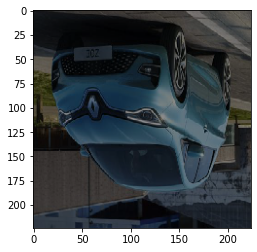

Label : Up !


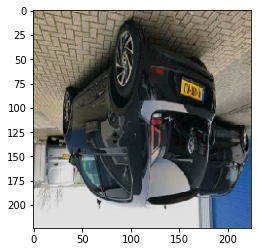

Label : Golf


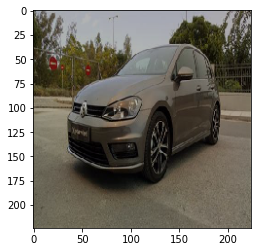

Label : C5 Aircross


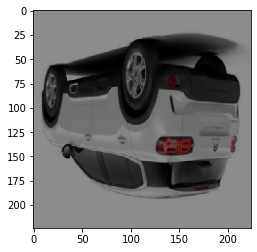

Label : C_HR


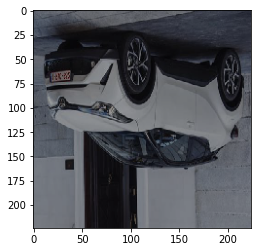

In [ ]:
# Let's visualize a group of images from the train set

from pathlib import Path

imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
  true_file_path = np.argmax(img_generator_flow_train.labels == tf.argmax(label))
  true_label_name = Path(img_generator_flow_train.filepaths[true_file_path]).parent.name
  print("Label :", true_label_name)
  plt.imshow(img)
  plt.show()

In [ ]:
# We'll use an already existing architecture: 'MobileNet' and use it to classify our cars pics

base_model = base_model = keras.applications.MobileNetV2(weights= 'imagenet' ,  
                                                  input_shape=( 224 , 224 , 3 ),
                                                  include_top= False )  

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# We can have a quick look at the architecture of our model

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
# Now we'll freeze our model so that only the custom layers will train

base_model.trainable = False

In [ ]:
# We removed the last layer to be able to adapt the model to our situation. So now let's to add our last layer.

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(set(img_generator_flow_train.labels)), activation="softmax")
])

In [ ]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model. 
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 1280)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                32025     
Total params: 2,290,009
Trainable params: 32,025
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Now let's practice our model

model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


82/82 [==============================] - 57s 655ms/step - loss: 5.3115 - categorical_accuracy: 0.1021 - val_loss: 3.9726 - val_categorical_accuracy: 0.1521
Epoch 2/100
82/82 [==============================] - 51s 627ms/step - loss: 3.4883 - categorical_accuracy: 0.2281 - val_loss: 3.2949 - val_categorical_accuracy: 0.2479
Epoch 3/100
82/82 [==============================] - 52s 631ms/step - loss: 2.8360 - categorical_accuracy: 0.3232 - val_loss: 2.8052 - val_categorical_accuracy: 0.3251
Epoch 4/100
82/82 [==============================] - 52s 631ms/step - loss: 2.4145 - categorical_accuracy: 0.3860 - val_loss: 2.8143 - val_categorical_accuracy: 0.3143
Epoch 5/100
82/82 [==============================] - 52s 638ms/step - loss: 2.1558 - categorical_accuracy: 0.4347 - val_loss: 2.5148 - val_categorical_accuracy: 0.3792
Epoch 6/100
82/82 [==============================] - 54s 665ms/step - loss: 2.0011 - categorical_accuracy: 0.4645 - val_loss: 2.7593 - val_categorical_accuracy: 0.3637
Epoc

In [ ]:
model.summary()

In [ ]:
# We can visualize the learning process thanks to our history attribute from our model object

plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c="r", label="train_loss")
plt.plot(model.history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Now we'll see if our machine can recognize some cars pictures. We're gonna take 5 pictures of cars (3 of our selction and 2 different)

data_predict = pathlib.Path("/content/drive/MyDrive/Jedha/Final_project/cars_pic/model_predict")
print(data_predict)

In [ ]:
for pic_pred in data_predict.iterdir():
  print(pic_pred)

In [ ]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1), 
                                                                #shear_range=0.2, 
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255)

In [ ]:
img_generator_pred_valid = img_generator.flow_from_directory(
    directory="/content/drive/MyDrive/Jedha/Final_project/cars_pic/model_predict",
    target_size=(224, 224),
    batch_size=4,
    shuffle=True)

In [ ]:
import os

rootdir = '/content/drive/MyDrive/Jedha/Final_project/cars_pic/cars_model' #définis le dossier où se situent les sous dossiers qui contiennent tes images
id_to_class = {} #définis un dictionnaire vide qui va servir à faire correspondre chaque entier (id) à une classe
i = 0 #initialise un itérateur

listdir_ = os.listdir(rootdir)
listdir_.sort()

for dir in listdir_: #parcours les sous-dossiers
    id_to_class[i] = dir #associe un entier comme clef à un nom de dossier (une classe) comme valeur
    i += 1 #incrémente ton itérateur

print(id_to_class) #vérifie ton dictionnaire

print(id_to_class[0]) #vérifie avec un test

In [ ]:
from pathlib import Path

imgs, labels = next(iter(img_generator_pred_valid))
prediction = model.predict(imgs)
pred_labels = tf.argmax(prediction, axis = -1)
i = 0
for img, label in zip(imgs, labels):
  true_file_path = np.argmax(img_generator_pred_valid.labels == tf.argmax(label))
  true_label_name = Path(img_generator_pred_valid.filepaths[true_file_path]).parent.name
  print('Pred :', id_to_class[pred_labels[i].numpy()])
  print("Label :", true_label_name)
  plt.imshow(img)
  plt.show()
  i+=1